# Facial Expression Recognition - Using FER2013 Database
**Author**: Christopher Holzweber

**Institution**: Johannes Kepler Universität Linz - Institute of Computational Perception

**Intention**: Bachelorthesis - Prototype for FER

**Description**: 
In this Notebook File a CNN Model is trained using the FER2013 Dataset. Here two strategies are used:

# 1: Training Model from Scratch with original Data, augmentation + histogram equalization.

This CNN Architekture is based on the paper

Facial Emotion Recognition Using Deep Convolutional Neural Network by 

Pranav E.
School of Engineering
Cochin University of Science
and Technology
Kochi, India

Suraj Kamal
Department of Electronics
Cochin University of Science and
Technology
Kochi, India

Satheesh Chandran C.
Department of Electronics
Cochin University of Science and
Technology
Kochi, India

Supriya M.H.
Department of Electronics
Cochin University of Science
and Technology
Kochi, India

Latest Results: loss: 0.9693 - accuracy: 0.6378 - val_loss: 1.2040 - val_accuracy: 0.5613

You can see, that the model is slightly overfitting for the untouched data


# 2: Training Model from Scratch with original Data + Augmented Data and histogram equalization. 

This model is a much deeper then the first approach. It is based on the paper

*Facial Expression Recognition using Convolutional Neural Networks: State of the Art 

by Christopher Pramerdorfer, Martin Kampel
Computer Vision Lab, TU Wien, Vienna, Austria*

Therefore this Model will train much longer, since there is more data to process.

latest results on accuracy: train_acc: valid_acc:

**Required Installations**:

Tensorflow: pip install tensorflow

Numpy: pip install numpy

OpenCV: pip install opencv-python

Matplotlib: python -m pip install -U matplotlib

Pandas: pip install pandas

Seaborn: pip install seaborn


In [1]:
# %tensorflow_version 2.x  # making sure using version 2 of tensorflow
import tensorflow as tf  # import tensorflow module
import numpy as np # standard lib. for calculations
import cv2  # library for imagehandling 
import matplotlib.pyplot as plt  # plotting images
import os  # for file handling and loading
import pandas as pd
import random # for datashuffling
from sklearn.metrics import confusion_matrix, plot_roc_curve # for evaluationg the CNN Models
import seaborn as sn # pi install seaborn - used for plotting confusion matrix

# Dataset
For this model the dataset FER2013 is used

https://www.kaggle.com/msambare/fer2013

The data is already seperated into a test and a train dataset.

The FER2013 set classifies facial emotions into 7 Categories:

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

In [ ]:
 # !unzip FER2013 # if training in google colab - upload zip file of FER2013 and unzip

**Define Classes and Data/Label Arrays**

In [3]:
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
IMG_SIZE = 48 #set pixel size of image, images are used to be IMG_SIZExIMG_SIZE
imagetype = 0 # 0 for grayscale, 1 for rgb
train_data = [] # picture data for model training
train_label = [] # labels of training data
test_data = [] # picture data for model testing
test_label = []  # labels of testing data

**Read all  Images from subfolders and return data  + label tuples**

The readData Method reads all Files from a given directory, consisting of Labeled Subfoldes. e.g. FER2013/0/xyz.png

In [4]:
def readData(directory,nrsubfolders):
    dataframe = []
    traindir = directory
    for cs in range(0, nrsubfolders):
        path = os.path.join(traindir,str(cs))  # Iterate over every subfolder
        for img in os.listdir(path):
            tempImg = cv2.imread(os.path.join(path,img),imagetype) #readImg
            tempImg = cv2.equalizeHist(tempImg) #histogram equalization
            tempImg = cv2.resize(tempImg, (IMG_SIZE, IMG_SIZE)) #resize to IMG_SIZE
            dataframe.append([tempImg,cs]) #append tuple to dataframe
    return dataframe

**Load all training and test images - shuffle them and normalize them**

In [5]:
tempdata = readData("./FER2013/train/",len(emotion_classes)) # read training data
random.shuffle(tempdata) #shuffle data
#store data in according arrays, seperating the created tuples 
for feat,label in tempdata:
    train_data.append(feat)
    train_label.append(label)
tempdata = readData("./FER2013/test/",len(emotion_classes)) # read testing data
random.shuffle(tempdata) #shuffle data
#store data in according arrays
for feat,label in tempdata:
    test_data.append(feat)
    test_label.append(label)

if imagetype==0: #grayscale mode
  # create arrays out of lists
  train_data = np.array(train_data).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  train_label = np.array(train_label)
  test_data = np.array(test_data).reshape(-1,IMG_SIZE,IMG_SIZE,1)
  test_label = np.array(test_label)
else: #rgb mode
  # create arrays out of lists
  train_data = np.array(train_data)
  train_label = np.array(train_label)
  test_data = np.array(test_data)
  test_label = np.array(test_label)


In [6]:
# normalize datavalues for machinelearning - best practice that values are between [0, 1]
z = np.array(255., dtype=np.float64) #if not enough RAM is available, use float32
train_data, test_data = train_data / z, test_data / z

# SetUp CNN Architecture

In [7]:
from tensorflow.keras import layers, models  # use models and layers given by tensorflow framework

In [8]:
# Model Skeleton reused form the Paper Facial Emotion Recognition Using Deep Convolutional Neural Network
if imagetype==0: #set dimension of input layer
  dim = 1 #grayscale channels
else:
  dim = 3 #rgb channels
initializer = tf.keras.initializers.HeNormal()
model2020 = models.Sequential()
#
model2020.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))
model2020.add(tf.keras.layers.experimental.preprocessing.RandomCrop(48,48))
model2020.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, dim),padding = 'same', kernel_initializer=initializer))
model2020.add(layers.MaxPooling2D((2, 2)))
model2020.add(layers.Dropout(.01))
model2020.add(layers.Conv2D(64, (3,3), activation='relu',padding = 'same', kernel_initializer=initializer))
model2020.add(layers.MaxPooling2D((2, 2)))
model2020.add(layers.Dropout(.01))
model2020.add(layers.Conv2D(128, (3, 3), activation='relu',padding = 'same', kernel_initializer=initializer))
model2020.add(layers.MaxPooling2D((2, 2)))
model2020.add(layers.Dropout(.01))
model2020.add(layers.Flatten())
model2020.add(layers.Dense(256, activation='relu'))
model2020.add(layers.Dense(128, activation='relu')) #added additional
model2020.add(layers.Dense(7, activation = 'softmax'))
#model2020.summary()

# *Training Area*

In [9]:
model2020.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2020.fit(train_data, train_label, epochs=6, 
                    validation_data=(test_data, test_label))

Epoch 1/6
898/898 [==============================] - 39s 7ms/step - loss: 1.7557 - accuracy: 0.3219 - val_loss: 1.4243 - val_accuracy: 0.4404
Epoch 2/6
898/898 [==============================] - 5s 6ms/step - loss: 1.3659 - accuracy: 0.4747 - val_loss: 1.2679 - val_accuracy: 0.5085
Epoch 3/6
898/898 [==============================] - 6s 6ms/step - loss: 1.2292 - accuracy: 0.5285 - val_loss: 1.2182 - val_accuracy: 0.5386
Epoch 4/6
898/898 [==============================] - 5s 6ms/step - loss: 1.1396 - accuracy: 0.5651 - val_loss: 1.2064 - val_accuracy: 0.5385
Epoch 5/6
898/898 [==============================] - 6s 6ms/step - loss: 1.0697 - accuracy: 0.5969 - val_loss: 1.1696 - val_accuracy: 0.5570
Epoch 6/6
898/898 [==============================] - 5s 6ms/step - loss: 0.9966 - accuracy: 0.6229 - val_loss: 1.1700 - val_accuracy: 0.5692


In [10]:
model2020.save('./SavedModels/model2020_fer2013_p48.h5')  # Save Model in Modeldirectory

# *Testing and Validation Area of Model2020*

In [11]:
acc = history.history['accuracy']

In [12]:
test_loss, test_acc = model2020.evaluate(test_data, test_label, verbose=2)

225/225 - 1s - loss: 1.1700 - accuracy: 0.5692


## Create Confusion Matrix of trained model

In [13]:
def getConfusionMatrix(model):
    predicted = model.predict(test_data)
    y_pred = []
    for i in range(0, 7178):
        y_pred.append(np.argmax(predicted[i,:]))
    y_pred = np.array(y_pred)
    return confusion_matrix(test_label, y_pred)

In [14]:
def printConfusionMatrix(model):
    conmatrix = getConfusionMatrix(model)
    df_cm = pd.DataFrame(conmatrix, index = [i for i in "0123456"],
                  columns = [i for i in "0123456"])

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True,fmt="d")
    plt.title('Confusion Matrix of CNN Model')
    # Set x-axis label
    plt.xlabel('Predicted')
    # Set y-axis label
    plt.ylabel('Actual')

In [15]:
def printROC(model):
  plot_roc_curve(model,test_data, test_label)  
  plt.show()

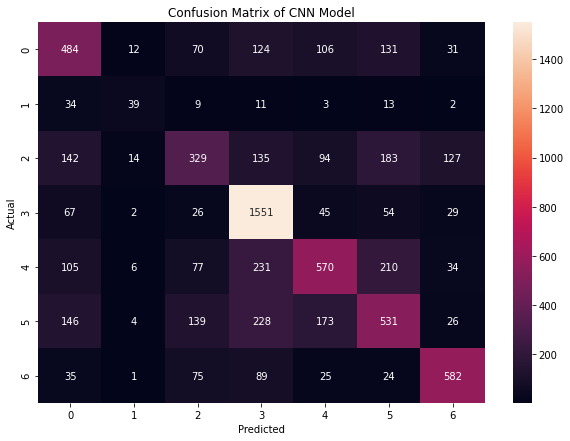

In [16]:
printConfusionMatrix(model2020)

In [17]:
printROC(model2020)

ValueError: ignored

## VGG Architekture Based

**CNN Model**

In [18]:
activation = 'relu'
initializer = tf.keras.initializers.HeNormal()
# Model Skeleton reused form the Paper Facial Expression Recognition using Convolutional Neural Networks: State of the Art
model_vgg = models.Sequential()
#
model_vgg.add(tf.keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))
model_vgg.add(tf.keras.layers.experimental.preprocessing.RandomCrop(48,48))
#Block 1
model_vgg.add(layers.Conv2D(64, (3,3), activation=activation, input_shape=(IMG_SIZE,IMG_SIZE, 1),padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Conv2D(64, (3,3), activation=activation,padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.MaxPooling2D((2, 2)))
#Block 2
model_vgg.add(layers.Conv2D(128, (3,3), activation=activation,padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Conv2D(128, (3,3), activation=activation))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.MaxPooling2D((2, 2)))
#Block 3
model_vgg.add(layers.Conv2D(256, (3, 3), activation=activation,padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Conv2D(256, (3, 3), activation=activation,padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.MaxPooling2D((2, 2)))
#Block 4
model_vgg.add(layers.Conv2D(512, (3, 3), activation=activation,padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Conv2D(512, (3, 3), activation=activation,padding = 'same', kernel_initializer=initializer))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.MaxPooling2D((2, 2)))
#End of Convolution
model_vgg.add(layers.Flatten())
#Dropout after first fully connected
model_vgg.add(layers.Dropout(0.5))
#Backend
model_vgg.add(layers.Dense(1024, activation='relu'))
model_vgg.add(layers.BatchNormalization())
model_vgg.add(layers.Dense(7, activation = 'softmax'))
#model_vgg.summary()

In [19]:
model_vgg.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, decay = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model_vgg.fit(train_data, train_label, epochs=14, 
                    validation_data=(test_data, test_label))

898/898 [==============================] - 27s 28ms/step - loss: 3.6545 - accuracy: 0.2158 - val_loss: 1.7951 - val_accuracy: 0.2625
Epoch 2/14
898/898 [==============================] - 24s 27ms/step - loss: 1.7689 - accuracy: 0.2744 - val_loss: 1.7290 - val_accuracy: 0.2868
Epoch 3/14
898/898 [==============================] - 24s 27ms/step - loss: 1.6753 - accuracy: 0.3370 - val_loss: 1.5910 - val_accuracy: 0.3653
Epoch 4/14
898/898 [==============================] - 25s 28ms/step - loss: 1.5452 - accuracy: 0.3903 - val_loss: 1.5757 - val_accuracy: 0.3735
Epoch 5/14
898/898 [==============================] - 25s 27ms/step - loss: 1.4233 - accuracy: 0.4436 - val_loss: 1.3760 - val_accuracy: 0.4663
Epoch 6/14
898/898 [==============================] - 24s 27ms/step - loss: 1.3311 - accuracy: 0.4842 - val_loss: 1.3012 - val_accuracy: 0.5035
Epoch 7/14
898/898 [==============================] - 25s 27ms/step - loss: 1.2500 - accuracy: 0.5221 - val_loss: 1.2861 - val_accuracy: 0.5026
Epo

In [23]:
model_vgg.save('./SavedModels/model_vgg_fer2013_p48.h5')  # Save Model

In [21]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_1 (RandomFlip)   (None, 48, 48, 1)         0         
_________________________________________________________________
random_crop_1 (RandomCrop)   (None, 48, 48, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)       

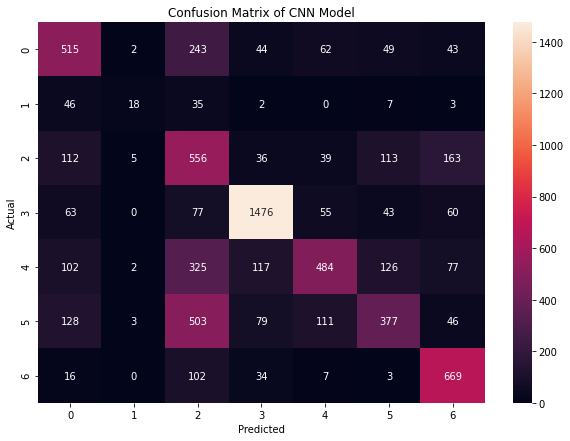

In [22]:
printConfusionMatrix(model_vgg)